# Garmin Project Jupyter Notebook

---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pytz


---

## Overview:
 1. Preprocess .csv files for viable graphing
 2. Present a few different research questions
 3. Create graphs that show these correlations


---


# Sleep


In [2]:
sleep = pd.read_csv('./data_final/sleep_final.csv')
sleep.info()
sleep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sleepStartTimestampGMT       232 non-null    object 
 1   sleepEndTimestampGMT         232 non-null    object 
 2   calendarDate                 232 non-null    object 
 3   sleepWindowConfirmationType  232 non-null    object 
 4   deepSleepSeconds             232 non-null    float64
 5   lightSleepSeconds            232 non-null    float64
 6   remSleepSeconds              231 non-null    float64
 7   awakeSleepSeconds            232 non-null    float64
 8   unmeasurableSeconds          232 non-null    float64
 9   retro                        232 non-null    bool   
 10  sleepTotalTimeStampGMT       232 non-null    object 
dtypes: bool(1), float64(5), object(5)
memory usage: 18.5+ KB


,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro,sleepTotalTimeStampGMT
0,2022-08-19 06:08:00,2022-08-19 11:13:00,2022-08-19,ENHANCED_CONFIRMED,3480.0,11580.0,2940.0,300.0,0.0,False,05:05:00
1,2022-08-20 06:13:00,2022-08-20 15:12:00,2022-08-20,ENHANCED_CONFIRMED,4680.0,17640.0,9660.0,360.0,0.0,False,08:59:00
2,2022-08-21 05:10:00,2022-08-21 11:30:00,2022-08-21,ENHANCED_CONFIRMED,5520.0,12780.0,4380.0,120.0,0.0,False,06:20:00
3,2022-08-22 06:09:00,2022-08-22 13:29:00,2022-08-22,ENHANCED_CONFIRMED,4920.0,14220.0,7140.0,120.0,0.0,False,07:20:00
4,2022-08-23 07:12:00,2022-08-23 13:33:00,2022-08-23,ENHANCED_CONFIRMED,5460.0,13620.0,3300.0,480.0,0.0,False,06:21:00


In [3]:
#Convert the calendarDate column to pd.datetime (prep for the combine dataframe)
sleep['calendarDate'] = pd.to_datetime(sleep['calendarDate'])

#add a 'date' column that doesn't have the time (used for later combining the datasets)
sleep['date'] = sleep['calendarDate'].dt.date

#add days of the week to each entry
sleep['dayOfWeek'] = sleep['calendarDate'].dt.day_name()

#change GMT to CST for graphing
sleep['sleepStartTimestampGMT'] = pd.to_datetime(sleep['sleepStartTimestampGMT'])
sleep['sleepEndTimestampGMT'] = pd.to_datetime(sleep['sleepEndTimestampGMT'])

#Convert 'sleepStartTimestampGMT' and 'sleepEndTimestampGMT' from GMT to CST
sleep['sleepStartTimestampGMT'] = sleep['sleepStartTimestampGMT'].dt.tz_localize('GMT')
sleep['sleepEndTimestampGMT'] = sleep['sleepEndTimestampGMT'].dt.tz_localize('GMT')
sleep['sleepStartTimestampCST'] = sleep['sleepStartTimestampGMT'].dt.tz_convert('US/Central')
sleep['sleepEndTimestampCST'] = sleep['sleepEndTimestampGMT'].dt.tz_convert('US/Central')

#remove time difference
sleep['sleepStartTimestampCST'] = sleep['sleepStartTimestampCST'].dt.tz_localize(None)
sleep['sleepEndTimestampCST'] = sleep['sleepEndTimestampCST'].dt.tz_localize(None)

In [4]:
sleep.head()

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro,sleepTotalTimeStampGMT,date,dayOfWeek,sleepStartTimestampCST,sleepEndTimestampCST
0,2022-08-19 06:08:00+00:00,2022-08-19 11:13:00+00:00,2022-08-19,ENHANCED_CONFIRMED,3480.0,11580.0,2940.0,300.0,0.0,False,05:05:00,2022-08-19,Friday,2022-08-19 01:08:00,2022-08-19 06:13:00
1,2022-08-20 06:13:00+00:00,2022-08-20 15:12:00+00:00,2022-08-20,ENHANCED_CONFIRMED,4680.0,17640.0,9660.0,360.0,0.0,False,08:59:00,2022-08-20,Saturday,2022-08-20 01:13:00,2022-08-20 10:12:00
2,2022-08-21 05:10:00+00:00,2022-08-21 11:30:00+00:00,2022-08-21,ENHANCED_CONFIRMED,5520.0,12780.0,4380.0,120.0,0.0,False,06:20:00,2022-08-21,Sunday,2022-08-21 00:10:00,2022-08-21 06:30:00
3,2022-08-22 06:09:00+00:00,2022-08-22 13:29:00+00:00,2022-08-22,ENHANCED_CONFIRMED,4920.0,14220.0,7140.0,120.0,0.0,False,07:20:00,2022-08-22,Monday,2022-08-22 01:09:00,2022-08-22 08:29:00
4,2022-08-23 07:12:00+00:00,2022-08-23 13:33:00+00:00,2022-08-23,ENHANCED_CONFIRMED,5460.0,13620.0,3300.0,480.0,0.0,False,06:21:00,2022-08-23,Tuesday,2022-08-23 02:12:00,2022-08-23 08:33:00


### Graphs

## What are my regular sleep patterns?

In [5]:
#create column for the hour I go to sleep
sleep['sleepStartHour'] = sleep['sleepStartTimestampCST'].dt.hour

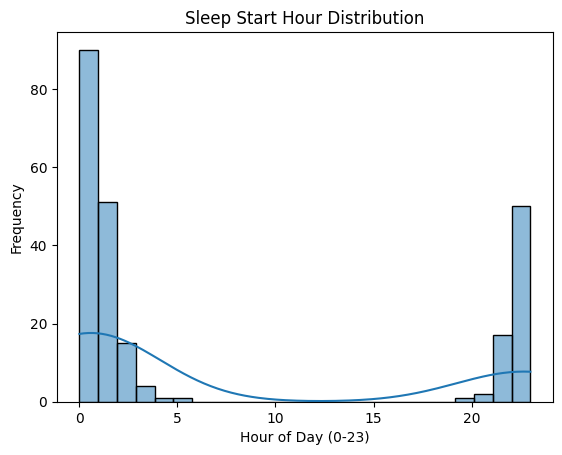

In [6]:
#diagram of sleep start hours
sns.histplot(data=sleep, x='sleepStartHour', bins=24, kde=True)
plt.title('Sleep Start Hour Distribution')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Frequency')
plt.show()

In [7]:
#create column for hour of sleep ending
sleep['sleepEndHour'] = sleep['sleepEndTimestampCST'].dt.hour

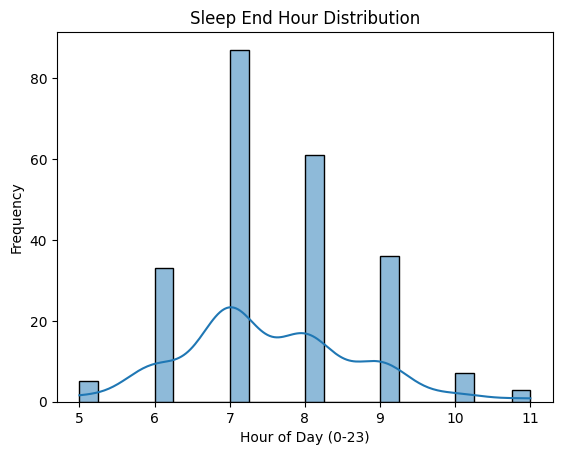

In [8]:
#diagram of sleep end hours
sns.histplot(data=sleep, x='sleepEndHour', bins=24, kde=True)
plt.title('Sleep End Hour Distribution')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Frequency')
plt.show()

In [9]:
#get total minutes and then hours slept
sleep['totalSleepSeconds'] = sleep['deepSleepSeconds'] + sleep['lightSleepSeconds'] + sleep['remSleepSeconds'] + sleep['awakeSleepSeconds']
sleep['totalSleepMinutes'] = sleep['totalSleepSeconds'] / 60
sleep['totalSleepHours'] = sleep['totalSleepMinutes'] / 60

In [10]:
sleep.head()

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro,sleepTotalTimeStampGMT,date,dayOfWeek,sleepStartTimestampCST,sleepEndTimestampCST,sleepStartHour,sleepEndHour,totalSleepSeconds,totalSleepMinutes,totalSleepHours
0,2022-08-19 06:08:00+00:00,2022-08-19 11:13:00+00:00,2022-08-19,ENHANCED_CONFIRMED,3480.0,11580.0,2940.0,300.0,0.0,False,05:05:00,2022-08-19,Friday,2022-08-19 01:08:00,2022-08-19 06:13:00,1,6,18300.0,305.0,5.083333
1,2022-08-20 06:13:00+00:00,2022-08-20 15:12:00+00:00,2022-08-20,ENHANCED_CONFIRMED,4680.0,17640.0,9660.0,360.0,0.0,False,08:59:00,2022-08-20,Saturday,2022-08-20 01:13:00,2022-08-20 10:12:00,1,10,32340.0,539.0,8.983333
2,2022-08-21 05:10:00+00:00,2022-08-21 11:30:00+00:00,2022-08-21,ENHANCED_CONFIRMED,5520.0,12780.0,4380.0,120.0,0.0,False,06:20:00,2022-08-21,Sunday,2022-08-21 00:10:00,2022-08-21 06:30:00,0,6,22800.0,380.0,6.333333
3,2022-08-22 06:09:00+00:00,2022-08-22 13:29:00+00:00,2022-08-22,ENHANCED_CONFIRMED,4920.0,14220.0,7140.0,120.0,0.0,False,07:20:00,2022-08-22,Monday,2022-08-22 01:09:00,2022-08-22 08:29:00,1,8,26400.0,440.0,7.333333
4,2022-08-23 07:12:00+00:00,2022-08-23 13:33:00+00:00,2022-08-23,ENHANCED_CONFIRMED,5460.0,13620.0,3300.0,480.0,0.0,False,06:21:00,2022-08-23,Tuesday,2022-08-23 02:12:00,2022-08-23 08:33:00,2,8,22860.0,381.0,6.350000


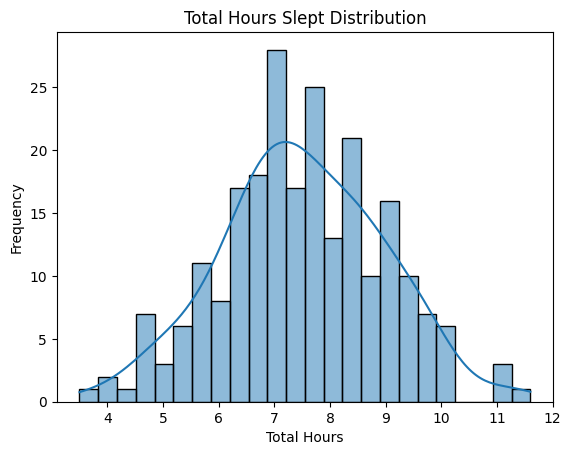

In [25]:
#diagram of total sleep hours
sns.histplot(data=sleep, x='totalSleepHours', bins=24, kde=True)
plt.title('Total Hours Slept Distribution')
plt.xlabel('Total Hours')
plt.ylabel('Frequency')
plt.show()

## What kind of sleep am I getting during the week?

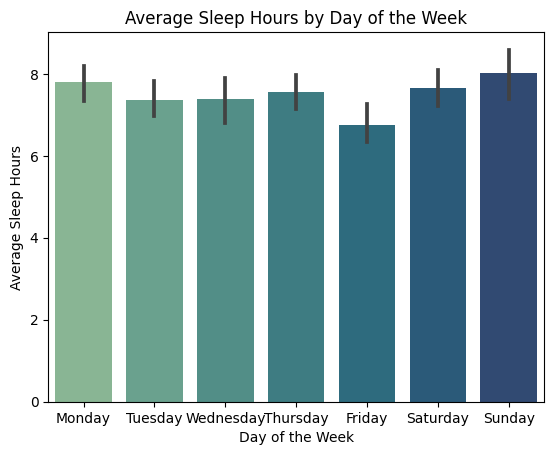

In [12]:
#Bar plot of the avg. amount of sleep hours by Day of the Week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.barplot(data=sleep, x='dayOfWeek', y='totalSleepHours', order=days, palette='crest')
plt.title('Average Sleep Hours by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sleep Hours')
plt.show()



---

# Activities


In [13]:
activities = pd.read_csv('./data_final/activities_final.csv')
activities.info()
activities.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             46 non-null     object 
 1   Date                      46 non-null     object 
 2   Favorite                  46 non-null     bool   
 3   Title                     46 non-null     object 
 4   Distance                  46 non-null     float64
 5   Calories                  46 non-null     object 
 6   Time                      46 non-null     object 
 7   Avg HR                    46 non-null     int64  
 8   Max HR                    46 non-null     int64  
 9   Aerobic TE                46 non-null     float64
 10  Avg Run Cadence           46 non-null     object 
 11  Max Run Cadence           46 non-null     object 
 12  Avg Pace                  46 non-null     object 
 13  Best Pace                 46 non-null     object 
 14  Total Ascent

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2023-03-13 08:31:49,False,Oxford Running,3.01,412,00:33:24,155,171,3.2,...,57.2,0:00,No,00:30.92,4,66.2,00:32:54,00:33:24,444,487
1,Treadmill Running,2023-03-01 16:02:40,False,Treadmill Running,1.14,213,00:23:30,129,179,2.6,...,84.2,0:00,No,01:48.79,2,86.0,00:13:22,00:23:30,--,--
2,Treadmill Running,2023-02-27 20:18:57,False,Treadmill Running,2.01,292,00:21:56,158,166,3.3,...,86.0,0:00,No,00:13.16,3,89.6,00:21:31,00:21:56,--,--
3,Indoor Running,2023-02-27 19:18:46,False,Indoor Running,1.08,140,00:10:38,160,177,2.7,...,80.6,0:00,No,00:44.86,2,82.4,00:10:38,00:10:38,--,--
4,Treadmill Running,2023-02-26 13:21:56,False,Treadmill Running,1.18,270,00:22:31,153,188,3.3,...,84.2,0:00,No,02:33.50,2,89.6,00:12:37,00:22:31,--,--


In [14]:
#Convert the Date column to pd.datetime (prep for the combine dataframe)
activities['Date'] = pd.to_datetime(activities['Date'])

#add a 'date' column that doesn't have the time (used for later combining the datasets)
activities['date'] = activities['Date'].dt.date

#add days of the week to each entry
activities['dayOfWeek'] = activities['Date'].dt.day_name()

#sort by day for graphing
activities = activities.sort_values(by='date')

In [15]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 45 to 0
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Activity Type             46 non-null     object        
 1   Date                      46 non-null     datetime64[ns]
 2   Favorite                  46 non-null     bool          
 3   Title                     46 non-null     object        
 4   Distance                  46 non-null     float64       
 5   Calories                  46 non-null     object        
 6   Time                      46 non-null     object        
 7   Avg HR                    46 non-null     int64         
 8   Max HR                    46 non-null     int64         
 9   Aerobic TE                46 non-null     float64       
 10  Avg Run Cadence           46 non-null     object        
 11  Max Run Cadence           46 non-null     object        
 12  Avg Pace                  46 

---

## Graphs


## What kinds of activities am I doing, and when in the week?

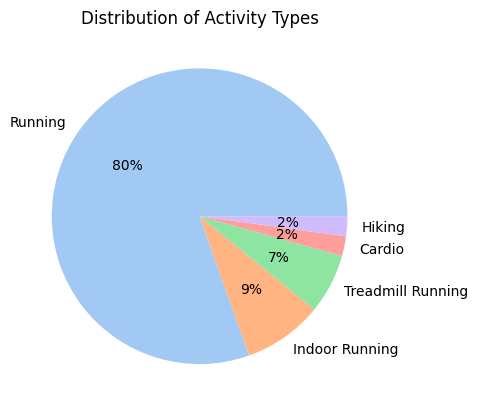

In [16]:
#Pie chart to show activity distribution
#Make a series of the counts, then colors based on amt of activities, then plot
activityCounts = activities['Activity Type'].value_counts()
colors = sns.color_palette('pastel')[0:len(activityCounts)]
plt.pie(activityCounts, labels = activityCounts.index, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Activity Types')
plt.show()

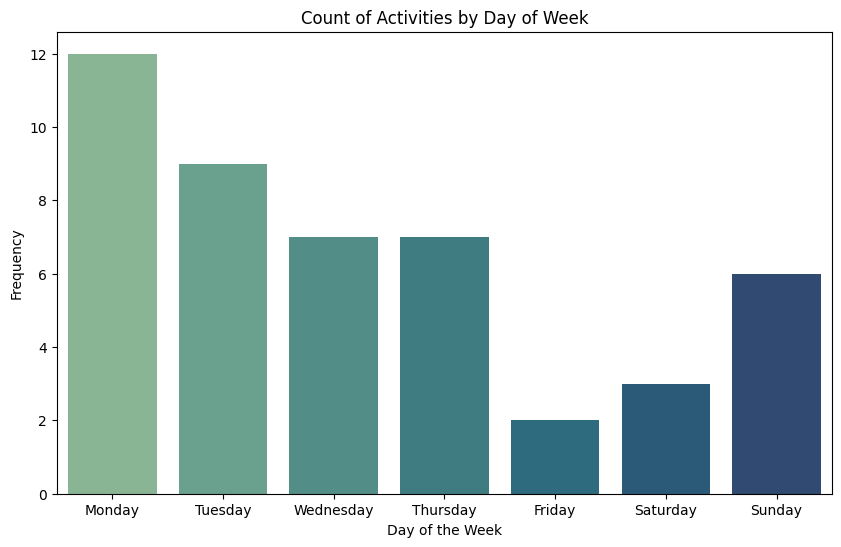

In [17]:
#Plot what day of the week most activities were recorded
plt.figure(figsize=(10,6))
sns.countplot(x='dayOfWeek', data=activities, order=days, palette='crest')
plt.title('Count of Activities by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

## Are there any noticeable shifts in my fitness?

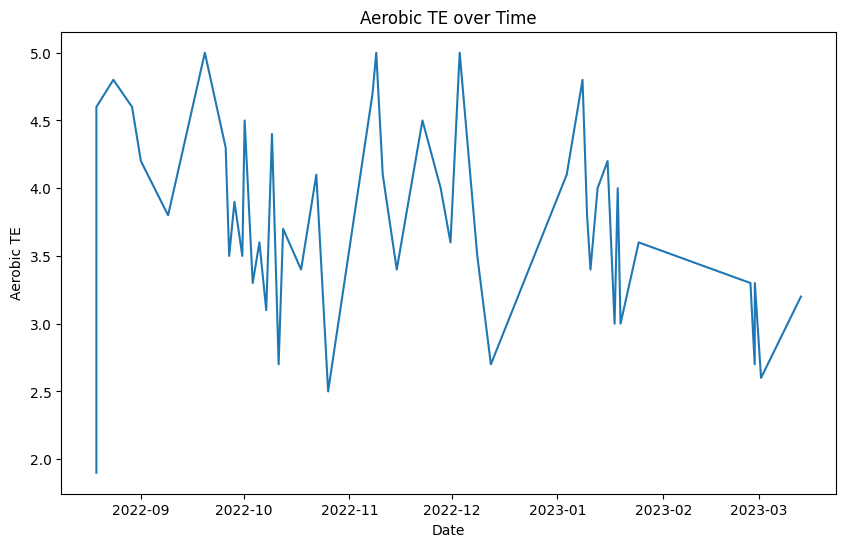

In [18]:
#Plot Aerobic Training Effect to show how it has changed during training
plt.figure(figsize=(10,6))
sns.lineplot(data=activities, x='Date', y='Aerobic TE')
plt.title('Aerobic TE over Time')
plt.xlabel('Date')
plt.ylabel('Aerobic TE')
plt.show()

In [19]:
#Want to look at Avg. Pace over time compared to Heart Rate
activities['Avg Pace'].info()
#Says it's an object, so need to turn them into numeric values first / went back and added if due to empty values
def convertPace(pace):
    if ':' in pace:
        min, sec = pace.split(':')
        return int(min) + int(sec) / 60
    else:
        return None

activities['Avg Pace'] = activities['Avg Pace'].apply(convertPace)

<class 'pandas.core.series.Series'>
Index: 46 entries, 45 to 0
Series name: Avg Pace
Non-Null Count  Dtype 
--------------  ----- 
46 non-null     object
dtypes: object(1)
memory usage: 736.0+ bytes


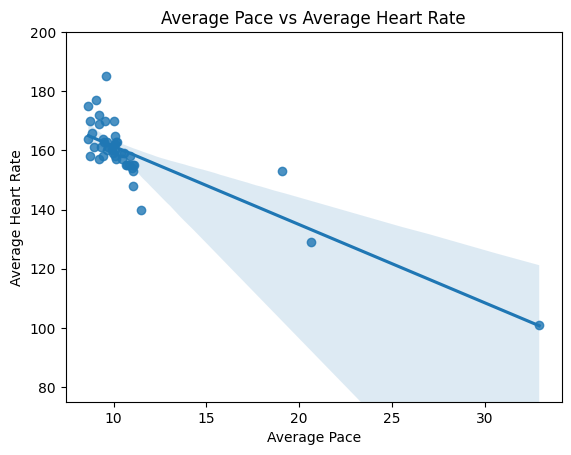

In [20]:
activities['Avg Pace'] = pd.to_numeric(activities['Avg Pace'])
sns.regplot(data=activities, x='Avg Pace', y='Avg HR')
plt.title('Average Pace vs Average Heart Rate')
plt.xlabel('Average Pace')
plt.ylabel('Average Heart Rate')
plt.ylim(75,200)
plt.show()



---
# Combined


## Does high exertion lead to better sleep?

In [21]:
combined = pd.merge(sleep, activities, on='date', how='left')

In [22]:
combined.head()

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro,...,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,dayOfWeek_y
0,2022-08-19 06:08:00+00:00,2022-08-19 11:13:00+00:00,2022-08-19,ENHANCED_CONFIRMED,3480.0,11580.0,2940.0,300.0,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-20 06:13:00+00:00,2022-08-20 15:12:00+00:00,2022-08-20,ENHANCED_CONFIRMED,4680.0,17640.0,9660.0,360.0,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-21 05:10:00+00:00,2022-08-21 11:30:00+00:00,2022-08-21,ENHANCED_CONFIRMED,5520.0,12780.0,4380.0,120.0,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-22 06:09:00+00:00,2022-08-22 13:29:00+00:00,2022-08-22,ENHANCED_CONFIRMED,4920.0,14220.0,7140.0,120.0,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-23 07:12:00+00:00,2022-08-23 13:33:00+00:00,2022-08-23,ENHANCED_CONFIRMED,5460.0,13620.0,3300.0,480.0,0.0,False,...,0:00,No,01:58.49,4.0,84.2,00:28:08,00:28:17,"2,505","2,590",Tuesday


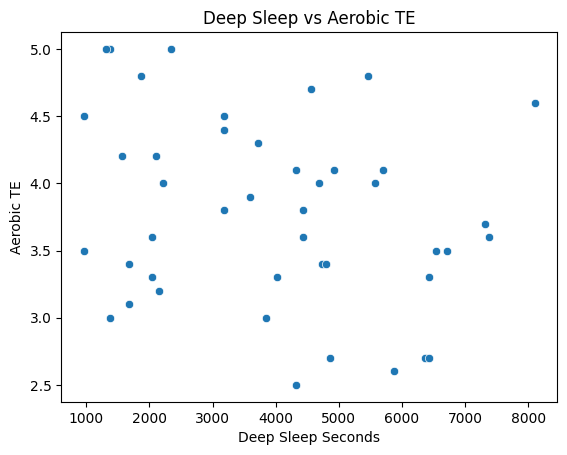

In [23]:
sns.scatterplot(data=combined, x='deepSleepSeconds', y='Aerobic TE')
plt.title('Deep Sleep vs Aerobic TE')
plt.xlabel('Deep Sleep Seconds')
plt.ylabel('Aerobic TE')
plt.show()

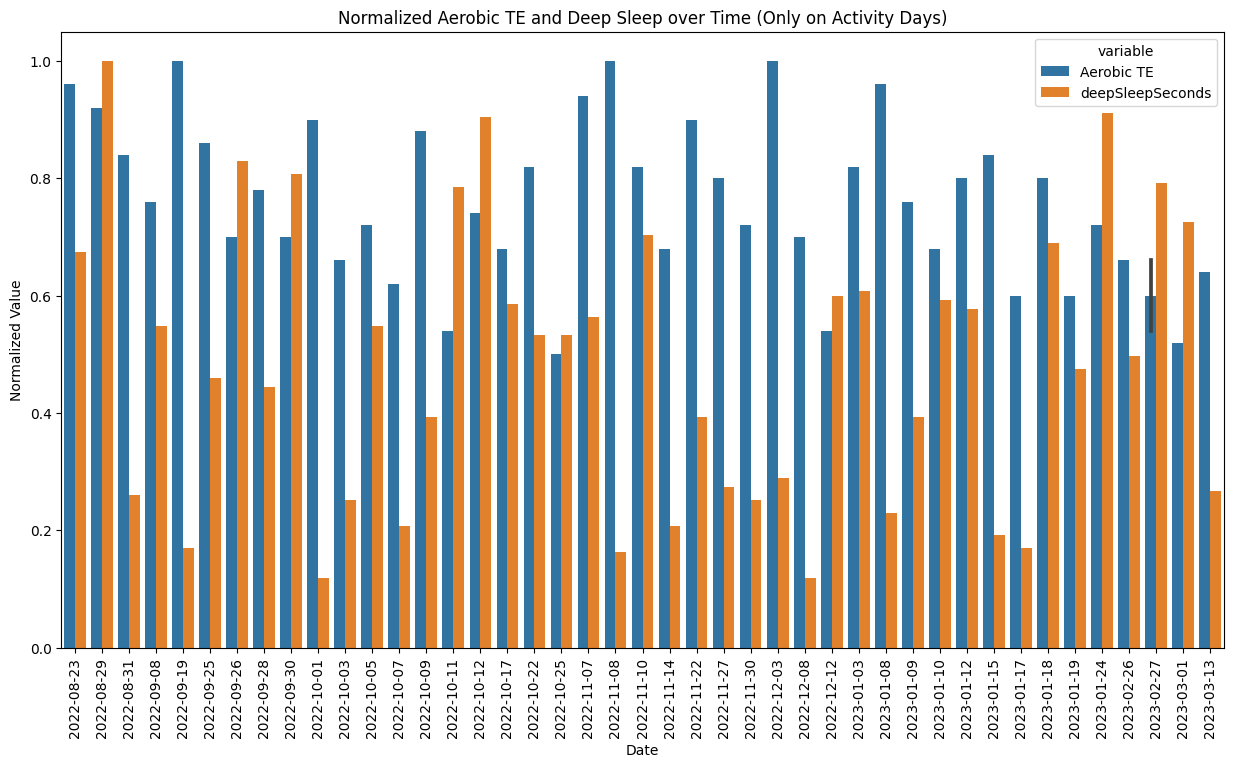

In [24]:
combinedByActivity = combined[combined['Activity Type'].notna()]
combinedByActivity = combinedByActivity.copy()

# Normalize 'Aerobic TE' and 'deepSleepSeconds'
combinedByActivity['Aerobic TE'] /= combinedByActivity['Aerobic TE'].max()
combinedByActivity['deepSleepSeconds'] /= combinedByActivity['deepSleepSeconds'].max()

# Convert the dataframe to long format
combinedLong = pd.melt(combinedByActivity, id_vars='date', value_vars=['Aerobic TE', 'deepSleepSeconds'])

# Create the barplot
plt.figure(figsize=(15, 8))
sns.barplot(data=combinedLong, x='date', y='value', hue='variable')
plt.title('Normalized Aerobic TE and Deep Sleep over Time (Only on Activity Days)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.xticks(rotation=90)
plt.show()